# Trabalho de Inteligência Artificial - Predição de capacidade de pagamento de empréstimo
## Realizado por Leandro Fonseca e Pedro Pinto

### Fonte dos dados: [Link](https://www.kaggle.com/datasets/zaurbegiev/my-dataset?select=credit_train.csv)

Primeiramente foram carregados os dados de treino e os dados de teste

In [52]:
import pandas as pandas
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import  permutation_importance
from sklearn import svm
import matplotlib.pyplot as mplt
import numpy as np

train_data = pandas.read_csv("datasets/credit_train.csv") #carregar csv de treino
test_data = pandas.read_csv("datasets/credit_test.csv") #carregar csv de teste
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

### Análise de dados

Verificação de valores nulos nos dados

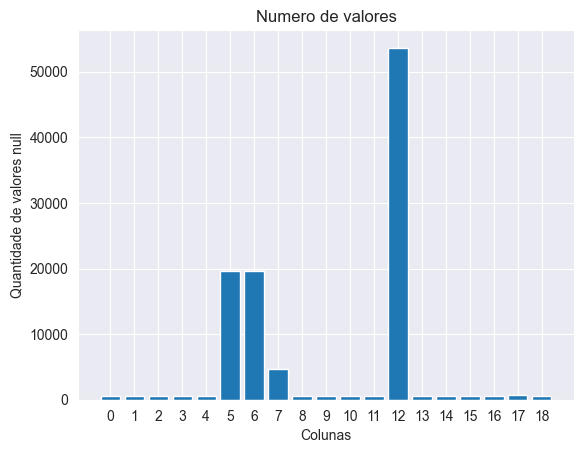

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [2]:
mplt.bar([x for x in range(len(train_data.columns))], train_data.isnull().sum())
x_labels = np.arange(0, 19, 1)
mplt.xticks(ticks=x_labels)
mplt.xlabel('Colunas')
mplt.ylabel('Quantidade de valores null')

# displaying the title
mplt.title("Numero de valores")
mplt.show()
train_data.isnull().sum()

In [3]:
train_data.drop(['Months since last delinquent', 'Loan ID', 'Customer ID'],axis=1, inplace=True)
train_data.dropna(axis = 0, inplace = True) #retirar valores nulos
train_data.drop_duplicates(inplace = True) #retirar valores duplicados
train_data.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [4]:
import pandas as pandas
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import  permutation_importance
import matplotlib.pyplot as mplt

train_data = pandas.read_csv("datasets/credit_train.csv") #carregar csv de treino
test_data = pandas.read_csv("datasets/credit_test.csv") #carregar csv de teste
train_data.drop(['Months since last delinquent', 'Loan ID', 'Customer ID'],axis=1, inplace=True)
train_data.dropna(axis = 0, inplace = True) #retirar valores nulos
train_data.drop_duplicates(inplace = True) #retirar valores duplicados
#substituir valores qualitativos por valores quantitativos
label_enconder = LabelEncoder()
train_data['Loan Status'] = label_enconder.fit_transform(train_data['Loan Status'])
train_data['Term'] = label_enconder.fit_transform(train_data['Term'])
train_data['Purpose'] = label_enconder.fit_transform(train_data['Purpose'])
train_data['Home Ownership'] = label_enconder.fit_transform(train_data['Home Ownership'])
train_data['Years in current job'] = label_enconder.fit_transform(train_data['Years in current job'])

In [5]:
# Criação de dados de treino e de dados de teste
X = train_data.drop(labels = 'Loan Status', axis = 1).values
y = train_data['Loan Status'].values

x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.30, random_state =86)

standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.fit_transform(x_test)

In [6]:
# Modelo Regressão Logística
log_reg = LogisticRegression(random_state=86)
log_reg.fit(x_train, y_train)
log_reg.score(x_train , y_train)
y_pred = log_reg.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(precision_score(y_test, y_pred)*100)
print(recall_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

82.39245320294366
81.15949688193636
100.0
89.60004667580733


In [7]:
# Modelo Random Forest
rand_forest = RandomForestClassifier(max_depth=16,max_features=16)
rand_forest.fit(x_train, y_train)
rand_forest.score(x_train,y_train)
y_pred = rand_forest.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(precision_score(y_test, y_pred)*100)
print(recall_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

81.78989479922951
81.87827797202797
97.59067526209546
89.04667122188884


In [8]:
# Modelo KNN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(precision_score(y_test, y_pred)*100)
print(recall_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

79.79947646564924
82.01761864165957
93.97017646675782
87.58800679776645


In [9]:
# Modelo Decision Tree
dec_tree = DecisionTreeClassifier(max_depth=16, max_features=16)
dec_tree.fit(x_train, y_train)
dec_tree.score(x_train, y_train)
y_pred = dec_tree.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(precision_score(y_test, y_pred)*100)
print(recall_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

76.27796710623797
82.46585455887782
87.28267239695253
84.80592198918097


Feature: 0, Score: 2.63960
Feature: 1, Score: 0.32272
Feature: 2, Score: -1.91485
Feature: 3, Score: 0.36547
Feature: 4, Score: -0.02477
Feature: 5, Score: -0.13529
Feature: 6, Score: -0.04433
Feature: 7, Score: -0.21107
Feature: 8, Score: 0.03528
Feature: 9, Score: -0.02383
Feature: 10, Score: -0.01784
Feature: 11, Score: -0.12560
Feature: 12, Score: 1.71669
Feature: 13, Score: 0.02309
Feature: 14, Score: -0.01544


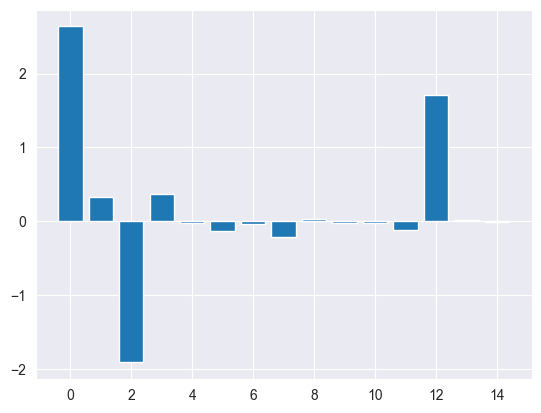

In [11]:
importance_log_reg = log_reg.coef_[0]
for i,v in enumerate(importance_log_reg):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_log_reg))], importance_log_reg)
mplt.show()

Feature: 0, Score: 0.13222
Feature: 1, Score: 0.00841
Feature: 2, Score: 0.48973
Feature: 3, Score: 0.05989
Feature: 4, Score: 0.02040
Feature: 5, Score: 0.00761
Feature: 6, Score: 0.01541
Feature: 7, Score: 0.06683
Feature: 8, Score: 0.05579
Feature: 9, Score: 0.02870
Feature: 10, Score: 0.00428
Feature: 11, Score: 0.05205
Feature: 12, Score: 0.05342
Feature: 13, Score: 0.00266
Feature: 14, Score: 0.00260


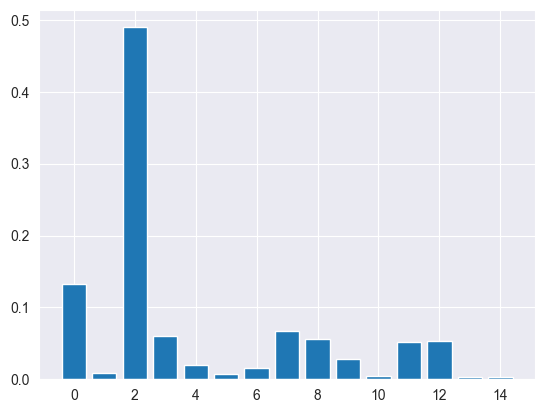

In [12]:
importance_dec_tree= dec_tree.feature_importances_
for i,v in enumerate(importance_dec_tree):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_dec_tree))], importance_dec_tree)
mplt.show()

Feature: 0, Score: 0.13342
Feature: 1, Score: 0.01029
Feature: 2, Score: 0.43988
Feature: 3, Score: 0.07682
Feature: 4, Score: 0.02492
Feature: 5, Score: 0.01039
Feature: 6, Score: 0.01714
Feature: 7, Score: 0.06853
Feature: 8, Score: 0.05865
Feature: 9, Score: 0.03485
Feature: 10, Score: 0.00450
Feature: 11, Score: 0.05701
Feature: 12, Score: 0.05802
Feature: 13, Score: 0.00336
Feature: 14, Score: 0.00221


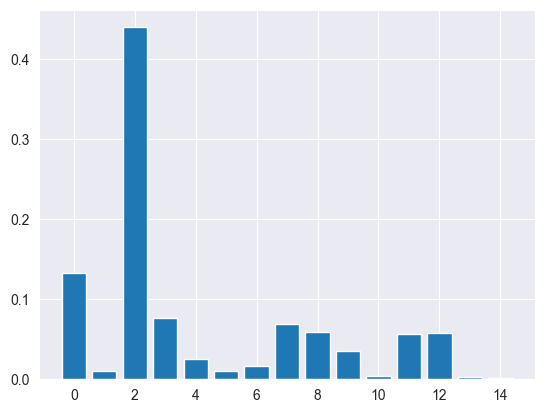

In [13]:
importance_rand_forest = rand_forest.feature_importances_
for i,v in enumerate(importance_rand_forest):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_rand_forest))], importance_rand_forest)
mplt.show()

Feature: 0, Score: 0.01314
Feature: 1, Score: 0.02984
Feature: 2, Score: 0.08932
Feature: 3, Score: 0.02010
Feature: 4, Score: 0.02802
Feature: 5, Score: 0.02840
Feature: 6, Score: 0.01297
Feature: 7, Score: 0.02698
Feature: 8, Score: 0.02844
Feature: 9, Score: 0.02624
Feature: 10, Score: 0.00665
Feature: 11, Score: 0.01517
Feature: 12, Score: 0.00010
Feature: 13, Score: 0.00953
Feature: 14, Score: 0.00234


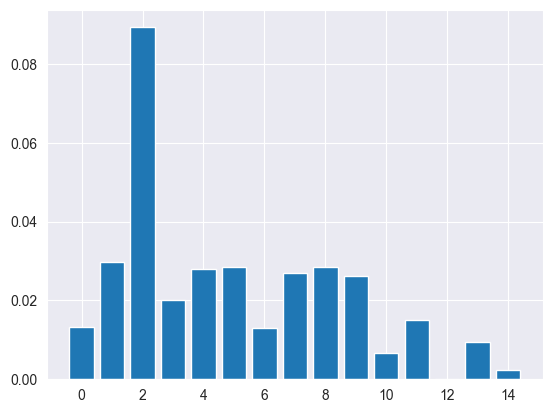

In [14]:
results = permutation_importance(knn, x_train, y_train, scoring='accuracy')
importance_knn = results.importances_mean
for i,v in enumerate(importance_knn):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_knn))], importance_knn)
mplt.show()

Feature: 0, Score: 0.13328
Feature: 1, Score: 0.10137
Feature: 2, Score: 0.41637
Feature: 3, Score: 0.03680
Feature: 4, Score: 0.02548
Feature: 5, Score: 0.03400
Feature: 6, Score: 0.03312
Feature: 7, Score: 0.03027
Feature: 8, Score: 0.02607
Feature: 9, Score: 0.02478
Feature: 10, Score: 0.02699
Feature: 11, Score: 0.02681
Feature: 12, Score: 0.02813
Feature: 13, Score: 0.02801
Feature: 14, Score: 0.02851


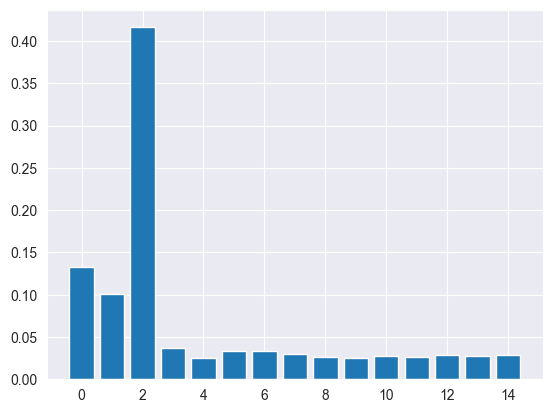

In [16]:
importance_xg = xg.feature_importances_
for i,v in enumerate(importance_xg):
    print('Feature: %0d, Score: %.5f' % (i,v))

mplt.bar([x for x in range(len(importance_xg))], importance_xg)
mplt.show()

In [44]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# parameter grid
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(x_train,y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8231273514956834


In [47]:
logreg = LogisticRegression(C = 0.001,
                            penalty = 'l1',
                            solver = 'liblinear')
logreg.fit(x_train,y_train)
pred = logreg.predict(x_test)
print("Accuracy:",logreg.score(x_test, y_test))
print(precision_score(y_test, pred)*100)
print(recall_score(y_test, pred)*100)
print(f1_score(y_test, pred)*100)

Accuracy: 0.8239739220625277
81.16378626922467
100.0
89.60266059863469


In [37]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [41]:
rand_forest=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')
rand_forest.fit(x_train, y_train)
y_pred=rand_forest.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred)*100)
print(recall_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

Accuracy for Random Forest on CV data:  0.8239739220625277


In [48]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid_knn.fit(x_train,y_train)
print("tuned hyperparameters :(best parameters) ",grid_knn.best_params_)
print("accuracy :",grid_knn.best_score_*100)

tuned hyperparameters :(best parameters)  {'n_neighbors': 29}
accuracy : 82.11587291246406


In [51]:
y_pred = grid_knn.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )
print(precision_score(y_test, y_pred)*100)
print(recall_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

Accuracy for our testing dataset with tuning is : 82.17%
81.2403595553428
99.45952985609169
89.43146554247907


In [53]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm, param_grid, refit = True, verbose =0,cv=5)

# fitting the model for grid search
grid.fit(x_train, y_train)

print("tuned hyperparameters :(best parameters) ",grid.best_params_)

print("accuracy :",grid.best_score_*100)

TypeError: estimator should be an estimator implementing 'fit' method, <module 'sklearn.svm' from 'C:\\Users\\Pedro\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\sklearn\\svm\\__init__.py'> was passed